In [0]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.models import load_model
model=load_model('cnn_model-10-epochs.h5')

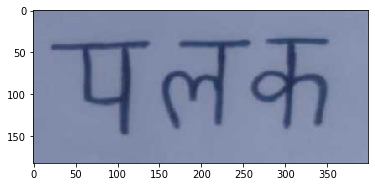

In [0]:
img = mpimg.imread('palak1.jpeg')
plt.imshow(img)

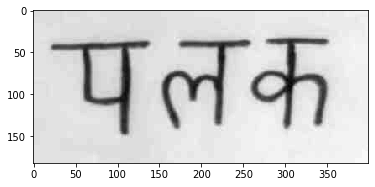

In [0]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Converting to GrayScale
plt.imshow(gray, cmap='gray')

In [0]:
#img = mpimg.imread('20.jpg')
h, w = img.shape[:2]
image_size = h*w
mser = cv2.MSER_create()
mser.setMaxArea(int(image_size/2))
mser.setMinArea(10)

gray_copy = np.copy(gray)
_, bw = cv2.threshold(gray_copy, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

regions, rects = mser.detectRegions(bw)
for (x, y, w, h) in rects:
    cv2.rectangle(gray_copy, (x, y), (x+w, y+h), color=(0, 0, 255), thickness=2)

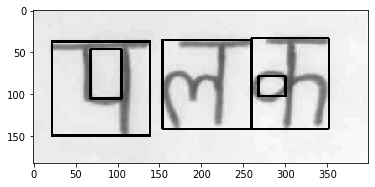

In [0]:
plt.imshow(gray_copy, cmap='gray')

In [0]:
print(rects)

[[260  33  92 108]
 [ 22  37 117 112]
 [154  35 105 106]
 [268  78  32  24]
 [ 68  46  37  59]]


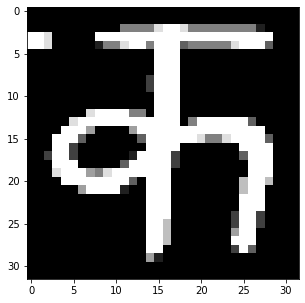

In [0]:
i = 0
crop_img1 = gray[rects[i][1]-10:rects[i][1]+rects[i][3]+10, rects[i][0]-10:rects[i][0]+rects[i][2]+10]
ret, thresh_img = cv2.threshold(crop_img1, 127.5, 255, cv2.THRESH_BINARY_INV)
crop_img = cv2.resize(thresh_img, (32,32))
plt.figure(figsize = (5,5))
plt.imshow(crop_img, cmap='gray')
plt.show()

In [0]:
crop_img = crop_img.reshape(1, 32, 32, 1)
crop_img = np.asarray(crop_img, np.float)
crop_img /= 255

In [0]:
pred1=model.predict(crop_img)
maxi = np.argmax(pred1)
print(maxi)

0


In [0]:
images = []
for i in range(len(rects)):
    if rects[i][3] >= 50 and rects[i][2] >= 50:
        crop_img1 = gray[rects[i][1]-10:rects[i][1]+rects[i][3]+10, rects[i][0]-10:rects[i][0]+rects[i][2]+10]
        ret, thresh_img = cv2.threshold(crop_img1, 127, 255, cv2.THRESH_BINARY_INV)
        crop_img = cv2.resize(thresh_img, (32,32))
        images.append(crop_img)

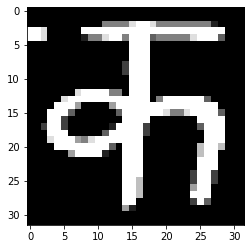

In [0]:
plt.imshow(images[0], cmap='gray')

In [0]:
images_copy = np.asarray(images, np.float)
images_copy = images_copy.reshape(len(images_copy), 32, 32, 1)
images_copy /= 255

In [0]:
pred=model.predict(images_copy)
print(pred[0])

[9.99965429e-01 3.42672420e-16 1.01625624e-13 1.24499054e-14
 1.00717130e-13 8.44900118e-15 2.38866023e-12 4.61951170e-14
 3.28254391e-05 1.93663054e-11 2.09962815e-22 8.12670853e-14
 3.94392271e-17 2.23889172e-14 5.51362206e-15 2.46900575e-16
 1.82965817e-12 4.12723793e-18 1.79270424e-14 1.60287184e-09
 4.00997933e-15 1.58333330e-06 8.32583308e-12 8.85258302e-08
 8.06295262e-08 2.74800599e-11 1.28611076e-19 4.18558769e-13
 5.86184204e-13 2.19588302e-12 4.38526196e-13 2.63143427e-15
 1.62086009e-20 5.78038418e-16 8.02007460e-10 6.50816876e-15
 4.94304729e-19 2.31154720e-15 4.20067728e-14 1.31938299e-15
 4.90012075e-15 3.17846387e-16 5.29526332e-15 1.09803660e-17
 3.92587229e-21 8.37961619e-20]


In [0]:
import pandas as pd
pred_dataframe = pd.DataFrame(pred)

In [0]:
print(pred_dataframe)

             0             1             2             3             4   \
0  9.999654e-01  3.426724e-16  1.016256e-13  1.244991e-14  1.007171e-13   
1  2.089495e-16  2.145974e-18  2.910145e-11  1.894786e-12  3.444282e-18   
2  4.194663e-11  1.469725e-09  1.246386e-12  7.485778e-13  1.058850e-09   

             5             6             7             8             9   ...  \
0  8.449001e-15  2.388660e-12  4.619512e-14  3.282544e-05  1.936631e-11  ...   
1  7.121048e-10  2.213600e-15  2.791411e-13  4.675831e-24  1.060377e-11  ...   
2  7.649954e-12  1.812287e-14  4.531765e-08  1.581570e-10  1.565422e-08  ...   

             36            37            38            39            40  \
0  4.943047e-19  2.311547e-15  4.200677e-14  1.319383e-15  4.900121e-15   
1  1.742540e-21  3.631611e-11  1.462815e-16  5.528687e-20  3.121874e-18   
2  3.114725e-18  1.319036e-15  1.462501e-11  3.101358e-14  1.429862e-15   

             41            42            43            44            45  
0  

In [0]:
pred_dataframe.idxmax(axis = 1)

0     0
1    20
2    27
dtype: int64

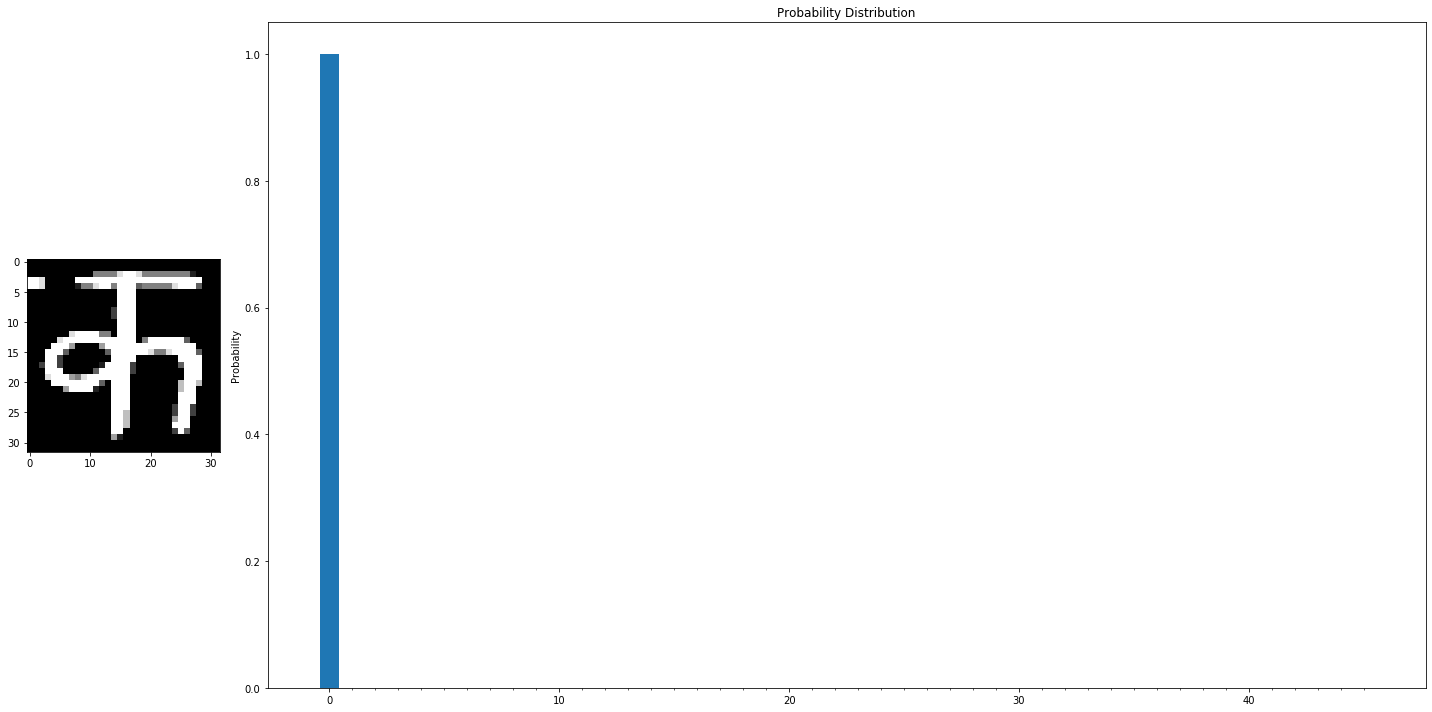

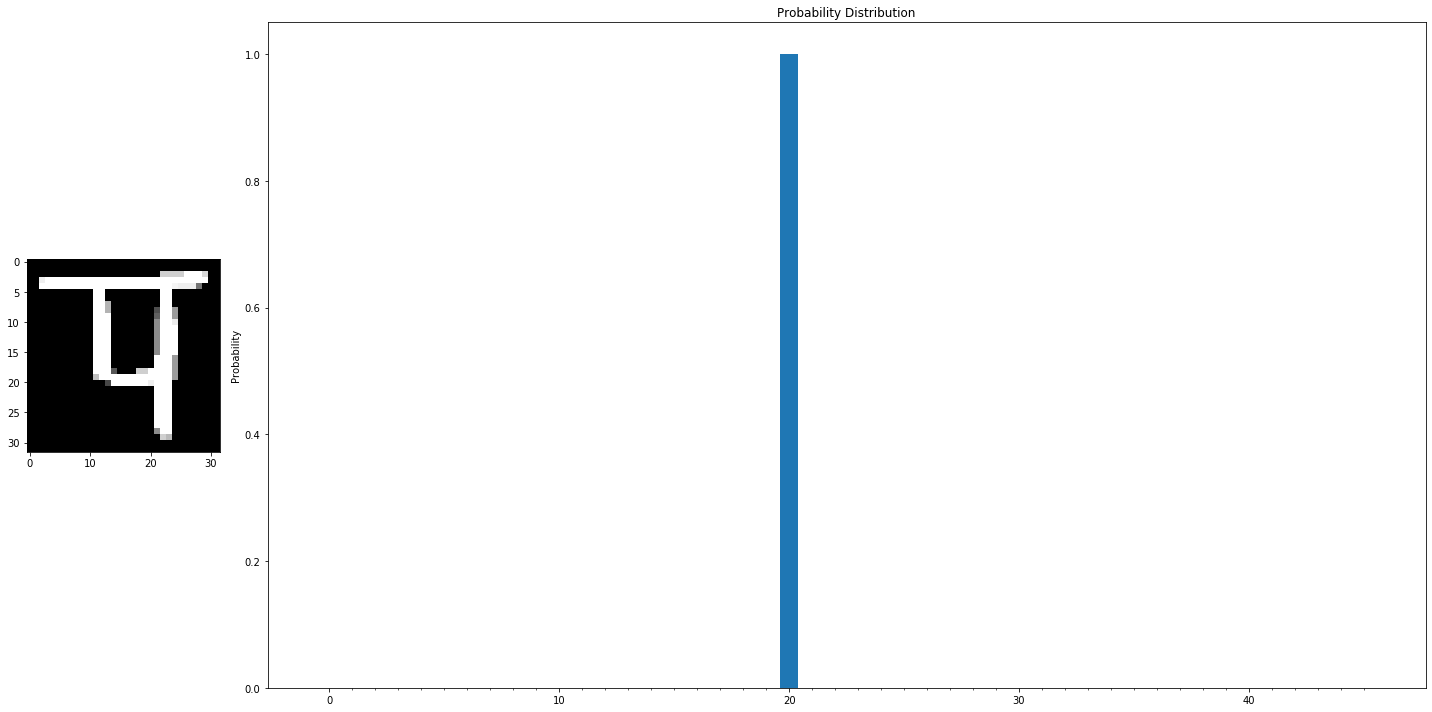

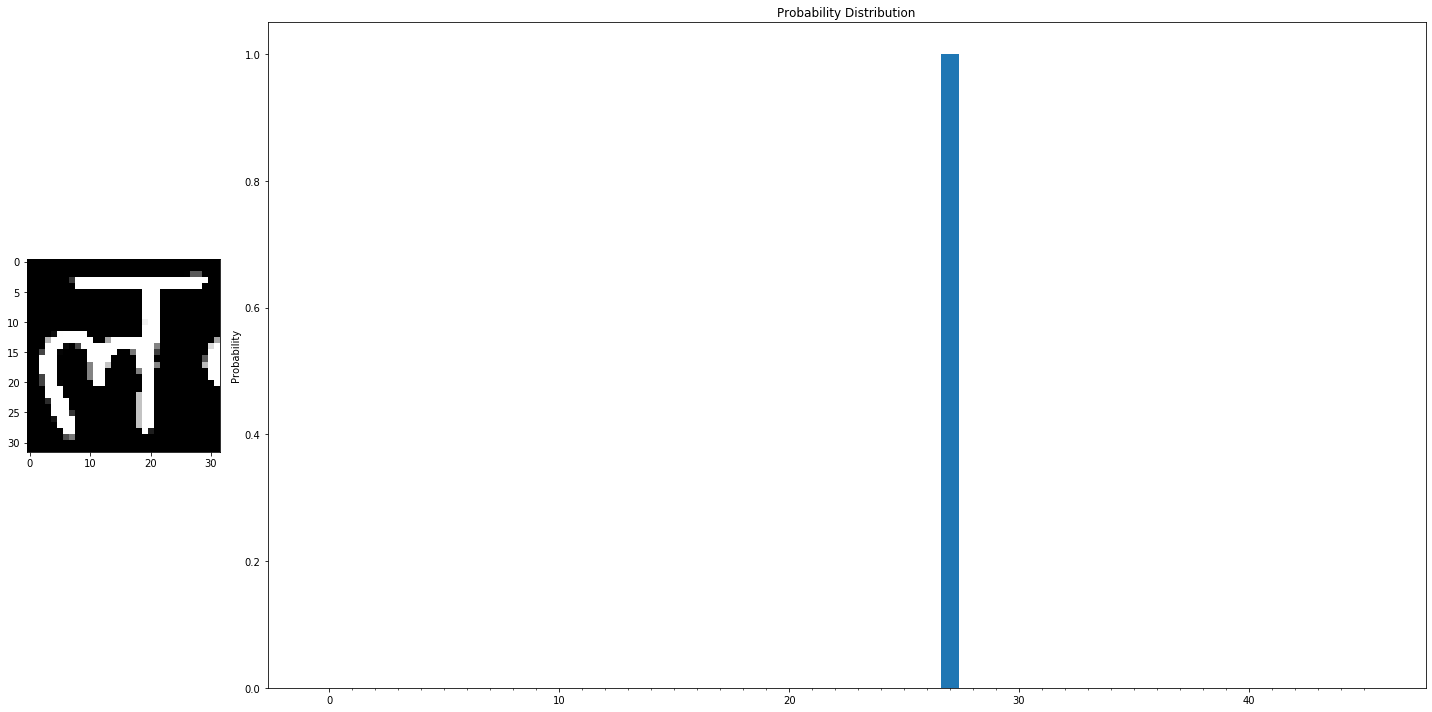

In [0]:
from matplotlib import gridspec
y_pos = np.arange(len(pred[0]))
xtick = [str(i) for i in range(len(pred[0]))]

for i in range(len(images)):
    fig = plt.figure(figsize=(20, 10)) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[0.5, 3]) 
    ax0 = plt.subplot(gs[0])
    ax0.imshow(images[i], cmap='gray')
    ax1 = plt.subplot(gs[1])
    ax1.bar(y_pos, pred[i], align='center', alpha=1)
    ax1.set_xticks(y_pos, xtick)
    ax1.set_ylabel('Probability')
    ax1.set_title('Probability Distribution')
    plt.tight_layout()
    plt.show()